In [1]:
!pwd

/panda/eedy/chile/s1_a149/mintpy_no_ion/geo


run view.py in MintPy version 1.6.0, date 2024-05-09
input file is velocity file: /panda/eedy/chile/s1_a149/mintpy_no_ion/geo/geo_velocity.h5 in float32 format
file size in y/x: (7884, 3432)
input dataset: "['velocity']"
turning glob search OFF for velocity file
num of datasets in file geo_velocity.h5: 5
datasets to exclude (0):
[]
datasets to display (1):
['velocity']
data   coverage in y/x: (0, 0, 3432, 7884)
subset coverage in y/x: (0, 0, 3432, 7884)
data   coverage in lat/lon: (-70.39506176975574, -18.400105740244985, -65.91568354138464, -26.531252419618024)
subset coverage in lat/lon: (-70.39506176975574, -18.400105740244985, -65.91568354138464, -26.531252419618024)
------------------------------------------------------------------------
colormap: jet
initiate cartopy map projection: PlateCarree
figure title: geo_velocity_SET_ERA5_ramp_demErr
read mask from file: geo_maskTempCoh.h5
reading data ...
masking data
data    range: [-8.483129, 3.8444712] cm/year
display range: [-2.0, 2.

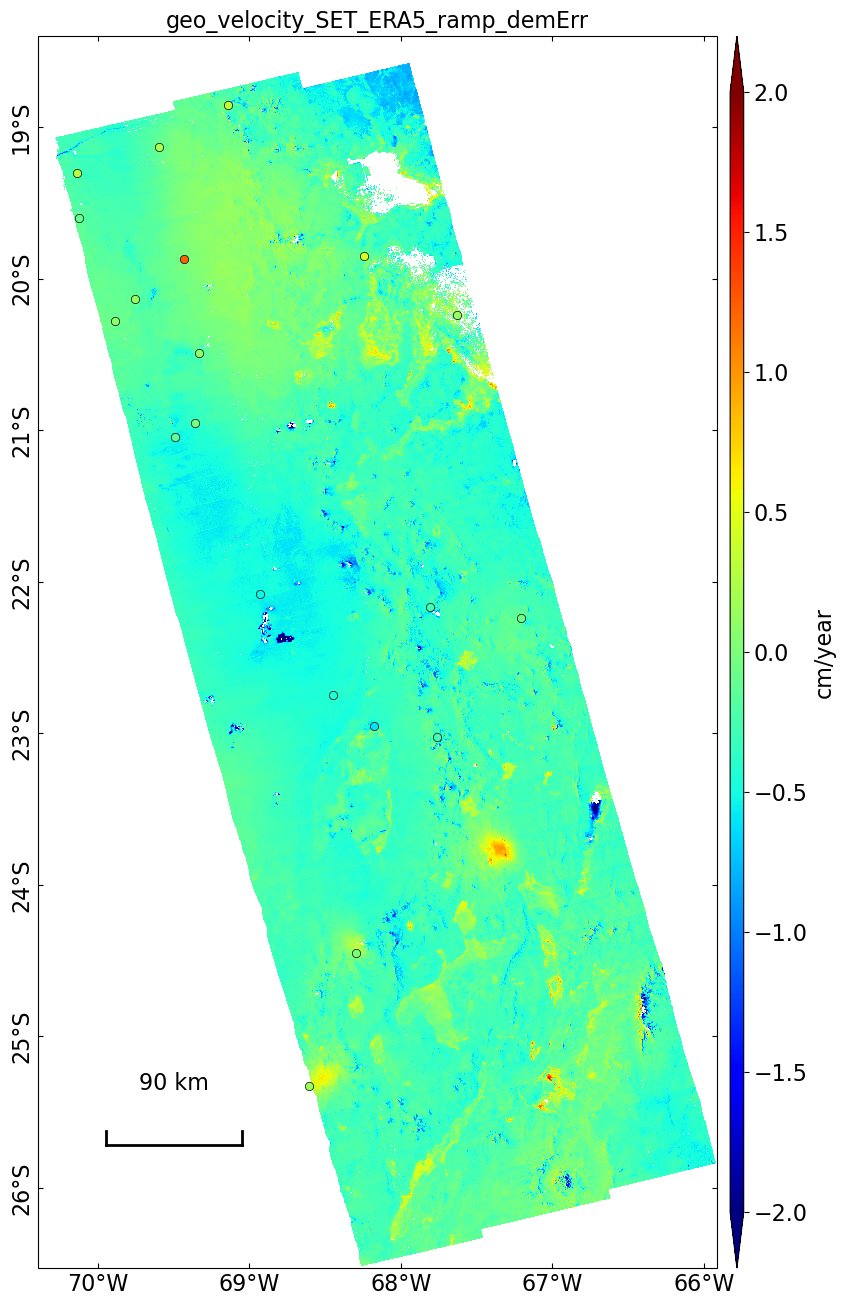

In [11]:
from mintpy.cli import view, tsview, plot_network, plot_transection
opt = '--show-gnss  --gnss-comp enu2los  -v -2 2 --lalo-label --lalo-step 1 --ylabel-rot 90  --figsize 20 16 --save --ref-gnss SOCM '
view.main(f' geo_velocity.h5 velocity {opt} -m geo_maskTempCoh.h5 --title geo_velocity_SET_ERA5_ramp_demErr'.split())

read GNSS velocity from file: gnss_enu2los_UNR.csv
read InSAR velocity from file: geo_velocity.h5
[==================================================] 66/66 VLZL    1s /     0s 
median offset between InSAR and GNSS [before common referencing]: 1.12 cm/year
referencing both InSAR and GNSS data to site: SOCM
removing sites with NaN values in GNSS or InSAR
GNSS   min/max: -0.62 / 0.47
InSAR min/max: -0.51 / 0.16
RMSE = 0.32 cm/yr
R^2 = 0.56
Preliminary outliers detection: abs(InSAR - GNSS) > med abs dev (0.22) * 5
Site:  InSAR  GNSS
save figure to file insar_vs_gnss_scatter.pdf


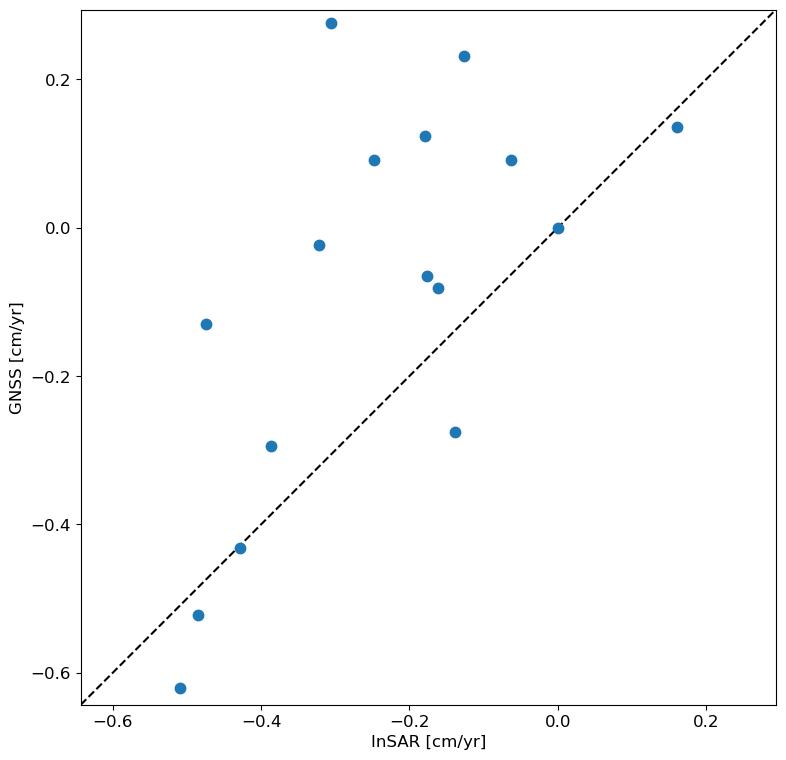

In [12]:
from mintpy.utils import readfile, utils as ut, plot as pp
kwargs = dict(ref_gnss_site='SOCM', csv_file='gnss_enu2los_UNR.csv',msk_file='geo_maskTempCoh.h5' , fig_size = (8,8) )
kwargs['ex_gnss_sites'] = ['PCHA']
sites, insar_obs, gnss_obs = pp.plot_insar_vs_gnss_scatter(vel_file='geo_velocity.h5', **kwargs)